In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

,Unnamed: 0,_RFBING6,SDHFOOD1,_BMI5CAT,RENTHOM1,ADDEPEV3,_AGE_G,_CHLDCNT,SDHBILLS,_EDUCAG,...,SDHEMPLY,_CASTHM1,SDLONELY,LSATISFY,_METSTAT,MARITAL,_INCOMG1,_TOTINDA,_SMOKER3,year
0,0,1.0,5.0,4.0,1.0,2.0,6.0,1.0,2.0,3.0,...,2.0,1.0,5.0,2.0,1.0,1.0,9.0,2.0,4.0,2023
1,1,1.0,5.0,3.0,1.0,1.0,6.0,1.0,2.0,3.0,...,2.0,1.0,3.0,1.0,1.0,2.0,9.0,1.0,4.0,2023
2,2,1.0,5.0,2.0,2.0,2.0,6.0,1.0,1.0,2.0,...,2.0,2.0,3.0,2.0,1.0,3.0,1.0,1.0,3.0,2023
3,3,1.0,5.0,3.0,1.0,1.0,6.0,1.0,2.0,3.0,...,2.0,1.0,3.0,1.0,2.0,1.0,9.0,1.0,4.0,2023
4,4,1.0,4.0,3.0,1.0,1.0,6.0,1.0,2.0,3.0,...,2.0,1.0,2.0,2.0,1.0,3.0,5.0,1.0,4.0,2023


In [3]:
df_clean = df.copy()

df_clean = df_clean.replace([9, 7], float('nan'))

df_clean = df_clean.dropna()

print(f"Original shape: {df.shape}")
print(f"Shape after cleaning: {df_clean.shape}")

df_clean.to_csv("cleaned_data.csv", index=False)
df_clean.head()

Original shape: (878455, 29)
Shape after cleaning: (189986, 29)


,Unnamed: 0,_RFBING6,SDHFOOD1,_BMI5CAT,RENTHOM1,ADDEPEV3,_AGE_G,_CHLDCNT,SDHBILLS,_EDUCAG,...,SDHEMPLY,_CASTHM1,SDLONELY,LSATISFY,_METSTAT,MARITAL,_INCOMG1,_TOTINDA,_SMOKER3,year
4,4.0,1.0,4.0,3.0,1.0,1.0,6.0,1.0,2.0,3.0,...,2.0,1.0,2.0,2.0,1.0,3.0,5.0,1.0,4.0,2023
6,6.0,1.0,5.0,2.0,1.0,2.0,6.0,1.0,2.0,2.0,...,2.0,1.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,2023
10,10.0,1.0,4.0,4.0,1.0,2.0,5.0,1.0,2.0,3.0,...,1.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,4.0,2023
15,15.0,1.0,5.0,3.0,1.0,2.0,6.0,1.0,2.0,2.0,...,2.0,1.0,3.0,2.0,1.0,3.0,2.0,1.0,4.0,2023
32,32.0,1.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,4.0,...,2.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,3.0,2023


In [4]:
# df_clean = df_clean[df_clean['year'] != 2022]

In [5]:
df_clean.drop(columns=['Unnamed: 0', 'year'], inplace=True)

In [6]:
df_clean['ADDEPEV3'] = df_clean['ADDEPEV3'].replace(2.0, 0.0)

In [7]:
X = df_clean.drop('ADDEPEV3', axis=1)
y = df_clean['ADDEPEV3']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## SMOTE

In [ ]:
smote = SMOTE(sampling_strategy="auto", random_state=42)

In [10]:
df_clean.shape

(189986, 27)

In [11]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## GradientBoostingClassifier

In [12]:
gb_model = GradientBoostingClassifier(random_state=42)

In [13]:
gb_model.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(random_state=42)

In [14]:
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

In [15]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_proba_gb)

In [16]:
print(f"\nGradient Boosting with SMOTE results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting with SMOTE results:
Accuracy: 0.7955
ROC AUC: 0.8128

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87     35593
         1.0       0.61      0.49      0.55     11904

    accuracy                           0.80     47497
   macro avg       0.73      0.70      0.71     47497
weighted avg       0.78      0.80      0.79     47497



## HistGradientBoostingClassifier

In [17]:
hgb_model = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')

hgb_model.fit(X_train, y_train)

y_pred_hgb = hgb_model.predict(X_test)
y_pred_proba_hgb = hgb_model.predict_proba(X_test)[:, 1]

In [18]:
hgb_accuracy = accuracy_score(y_test, y_pred_hgb)
hgb_roc_auc = roc_auc_score(y_test, y_pred_proba_hgb)

print(f"\nHistogram-based Gradient Boosting with SMOTE results:")
print(f"Accuracy: {hgb_accuracy:.4f}")
print(f"ROC AUC: {hgb_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hgb))


Histogram-based Gradient Boosting with SMOTE results:
Accuracy: 0.7440
ROC AUC: 0.8205

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81     35593
         1.0       0.49      0.74      0.59     11904

    accuracy                           0.74     47497
   macro avg       0.69      0.74      0.70     47497
weighted avg       0.79      0.74      0.76     47497



## RandomForest + Weighted Class

In [19]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)

In [21]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"\nRandom Forest with SMOTE results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest with SMOTE results:
Accuracy: 0.7911
ROC AUC: 0.7919

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     35593
         1.0       0.64      0.38      0.48     11904

    accuracy                           0.79     47497
   macro avg       0.73      0.66      0.67     47497
weighted avg       0.77      0.79      0.77     47497



## XGBoost

In [22]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=1)
xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test)

In [23]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"\nXGBoost results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC AUC: {xgb_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost results:
Accuracy: 0.8036
ROC AUC: 0.8182

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     35593
         1.0       0.67      0.43      0.52     11904

    accuracy                           0.80     47497
   macro avg       0.75      0.68      0.70     47497
weighted avg       0.79      0.80      0.79     47497



## Random Forest + SMOTE

In [24]:
rfs_model = RandomForestClassifier(random_state=42)
rfs_model.fit(X_train_balanced, y_train_balanced)
y_pred_rfs = rfs_model.predict(X_test)

In [25]:
rfs_accuracy = accuracy_score(y_test, y_pred_rfs)
rfs_roc_auc = roc_auc_score(y_test, rfs_model.predict_proba(X_test)[:, 1])

print(f"\nRandom Forest with SMOTE results:")
print(f"Accuracy: {rfs_accuracy:.4f}")
print(f"ROC AUC: {rfs_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfs))


Random Forest with SMOTE results:
Accuracy: 0.7909
ROC AUC: 0.7932

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     35593
         1.0       0.62      0.43      0.51     11904

    accuracy                           0.79     47497
   macro avg       0.72      0.67      0.69     47497
weighted avg       0.77      0.79      0.78     47497



In [26]:
#Summary of results
results_summary = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Histogram-based Gradient Boosting', 'Random Forest', 'Random Forest with SMOTE'],
    'Accuracy': [gb_accuracy, hgb_accuracy, rf_accuracy, rfs_accuracy],
    'ROC AUC': [roc_auc, hgb_roc_auc, rf_roc_auc, rfs_roc_auc]
})

print("\nSummary of Results:")
print(results_summary)


Summary of Results:
                               Model  Accuracy   ROC AUC
0                  Gradient Boosting  0.795461  0.812765
1  Histogram-based Gradient Boosting  0.743963  0.820518
2                      Random Forest  0.791082  0.791863
3           Random Forest with SMOTE  0.790871  0.793163


## Tunning RF

In [ ]:
rf_search = BayesSearchCV(
    rf_model,
    {
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 15),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 10),
        'max_samples' : Real(0.1, 1.0),
    },
    n_iter=30,
    cv=5,
    scoring='f1',
    random_state=42
)
rf_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=RandomForestClassifier(class_weight='balanced',
                                               random_state=42),
              n_iter=30, random_state=42, scoring='f1',
              search_spaces={'max_depth': Integer(low=3, high=15, prior='uniform', transform='normalize'),
                             'max_samples': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize')})

## Tunning GB + SMOTE

In [31]:
# pipeline = Pipeline([
#     ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
#     ('gb', GradientBoostingClassifier(random_state=42))
# ])

# gb_search = BayesSearchCV(
#     pipeline,
#     {
#         'gb__n_estimators': Integer(50, 300),
#         'gb__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
#         'gb__max_depth': Integer(3, 10),
#         'gb__subsample': Real(0.1, 1.0),
#         'gb__min_samples_split' : Integer(2, 10),
#         'gb__min_samples_leaf' : Integer(2, 10)
#     },
#     n_iter=30,
#     cv=5,
#     scoring='f1',
#     random_state=42
# )
# gb_search.fit(X_train, y_train)

## Tunning HGB

In [32]:
hist_search = BayesSearchCV(
    hgb_model,
    {
        'learning_rate': Real(0.01, 0.3),
        'max_iter': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'min_samples_leaf': Integer(10, 100),
    },
    n_iter=30,
    cv=5,
    scoring='f1',
    random_state=42
)
hist_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                       random_state=42),
              n_iter=30, random_state=42, scoring='f1',
              search_spaces={'learning_rate': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_iter': Integer(low=50, high=300, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize')})

## Tunning XGBoost

In [33]:
xgb_search = BayesSearchCV(
    xgb_model,
    {
        "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
        "max_depth": Integer(3, 12),
        "n_estimators": Integer(100, 1000),
        "subsample": Real(0.5, 1.0),
        "colsample_bytree": Real(0.5, 1.0),
        "gamma": Real(0, 5),
        "reg_alpha": Real(0, 1),
        "reg_lambda": Real(0, 1),
    },
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
)

xgb_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constrain...
                             'max_depth': Integer(low=3, high=12, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [34]:
hist_search_2 = BayesSearchCV(
    hgb_model,
    {
        'learning_rate': Real(0.01, 0.3),
        'max_iter': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'min_samples_leaf': Integer(10, 100),
    },
    n_iter=30,
    cv=5,
    scoring='recall',
    random_state=42
)
hist_search_2.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                       random_state=42),
              n_iter=30, random_state=42, scoring='recall',
              search_spaces={'learning_rate': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_iter': Integer(low=50, high=300, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize')})

# Evaluation

🔍 Evaluating: RF
Accuracy: 0.7911
ROC AUC: 0.8159
RF Best CV Score (train CV): 0.5868
RF Best Params: OrderedDict({'max_depth': 14, 'max_samples': 0.2298018610224598, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 256})

RF Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83     35593
         1.0       0.51      0.70      0.59     11904

    accuracy                           0.76     47497
   macro avg       0.70      0.74      0.71     47497
weighted avg       0.79      0.76      0.77     47497

RF Confusion Matrix:
[[27637  7956]
 [ 3618  8286]]


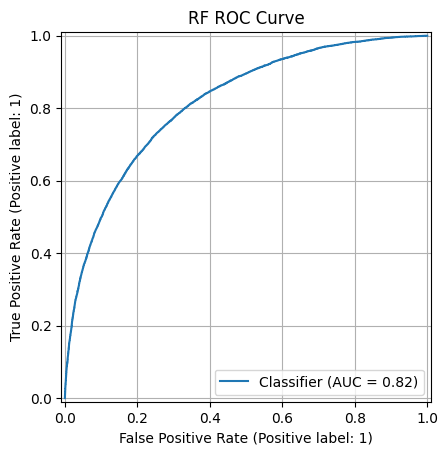

🔍 Evaluating: HistGB
Accuracy: 0.7563
ROC AUC: 0.8205
HistGB Best CV Score (train CV): 0.5898
HistGB Best Params: OrderedDict({'learning_rate': 0.26772236667438165, 'max_depth': 3, 'max_iter': 300, 'min_samples_leaf': 10})

HistGB Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81     35593
         1.0       0.49      0.73      0.59     11904

    accuracy                           0.75     47497
   macro avg       0.69      0.74      0.70     47497
weighted avg       0.79      0.75      0.76     47497

HistGB Confusion Matrix:
[[26652  8941]
 [ 3159  8745]]


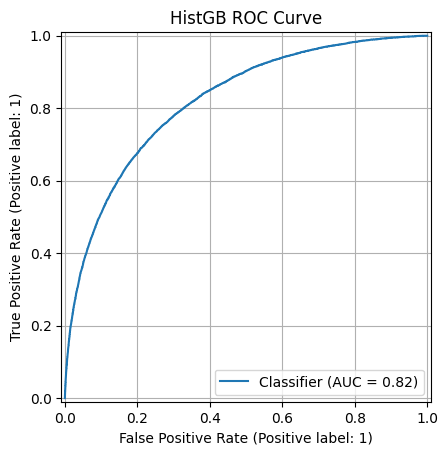

🔍 Evaluating: HistGB_recall
Accuracy: 0.7452
ROC AUC: 0.8188
HistGB_recall Best CV Score (train CV): 0.7322
HistGB_recall Best Params: OrderedDict({'learning_rate': 0.09840493527755191, 'max_depth': 10, 'max_iter': 50, 'min_samples_leaf': 69})

HistGB_recall Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81     35593
         1.0       0.49      0.74      0.59     11904

    accuracy                           0.74     47497
   macro avg       0.69      0.74      0.70     47497
weighted avg       0.79      0.74      0.76     47497

HistGB_recall Confusion Matrix:
[[26459  9134]
 [ 3123  8781]]


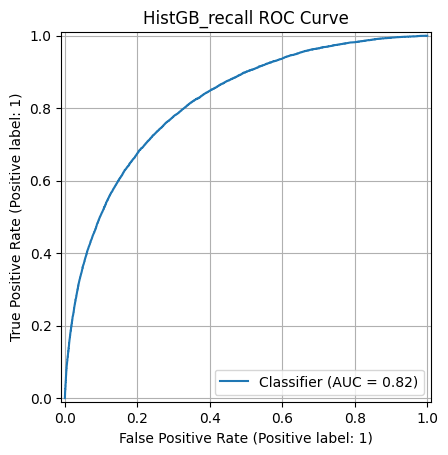

🔍 Evaluating: XGB
Accuracy: 0.7419
ROC AUC: 0.8196
XGB Best CV Score (train CV): 0.5213
XGB Best Params: OrderedDict({'colsample_bytree': 0.6650474075019361, 'gamma': 2.552343444689935, 'learning_rate': 0.06219862483643744, 'max_depth': 12, 'n_estimators': 1000, 'reg_alpha': 0.8157619380643978, 'reg_lambda': 0.11631930707535207, 'subsample': 0.5})

XGB Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     35593
         1.0       0.68      0.43      0.53     11904

    accuracy                           0.81     47497
   macro avg       0.75      0.68      0.70     47497
weighted avg       0.79      0.81      0.79     47497

XGB Confusion Matrix:
[[33125  2468]
 [ 6778  5126]]


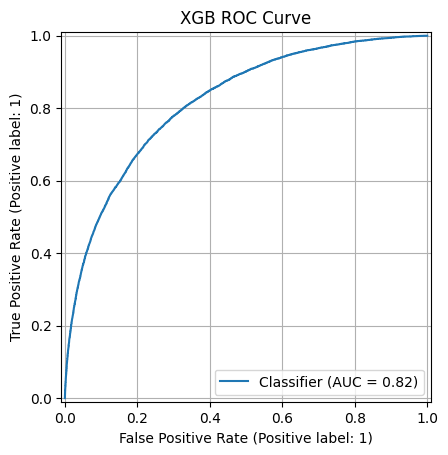

In [35]:
for name, model in [("RF", rf_search), ("HistGB", hist_search), ("HistGB_recall" , hist_search_2), ("XGB", xgb_search)]:
    print(f"🔍 Evaluating: {name}")

    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(f"ROC AUC: {rf_roc_auc:.4f}")

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"{name} Best CV Score (train CV): {model.best_score_:.4f}")
    print(f"{name} Best Params: {model.best_params_}\n")

    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{name} ROC Curve")
    plt.grid(True)
    plt.show()

## SHAP implementation

In [36]:
import shap

best_model = hist_search.best_estimator_

In [37]:
explainer = shap.TreeExplainer(best_model)

In [38]:
shap_values = explainer.shap_values(X_test)

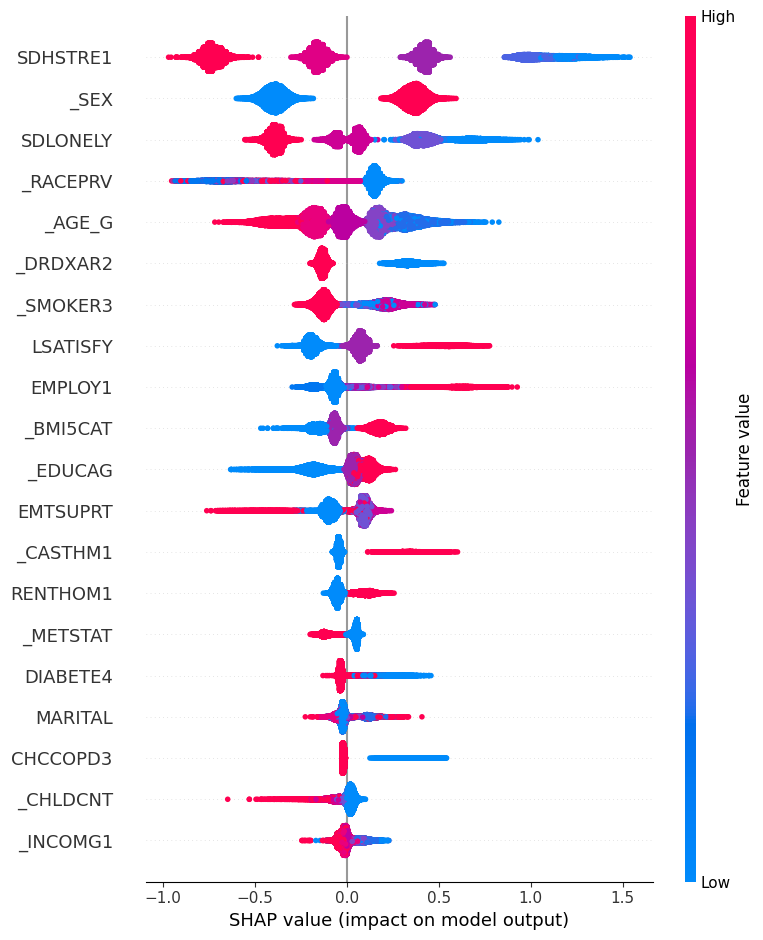

In [39]:
shap.summary_plot(shap_values, X_test)


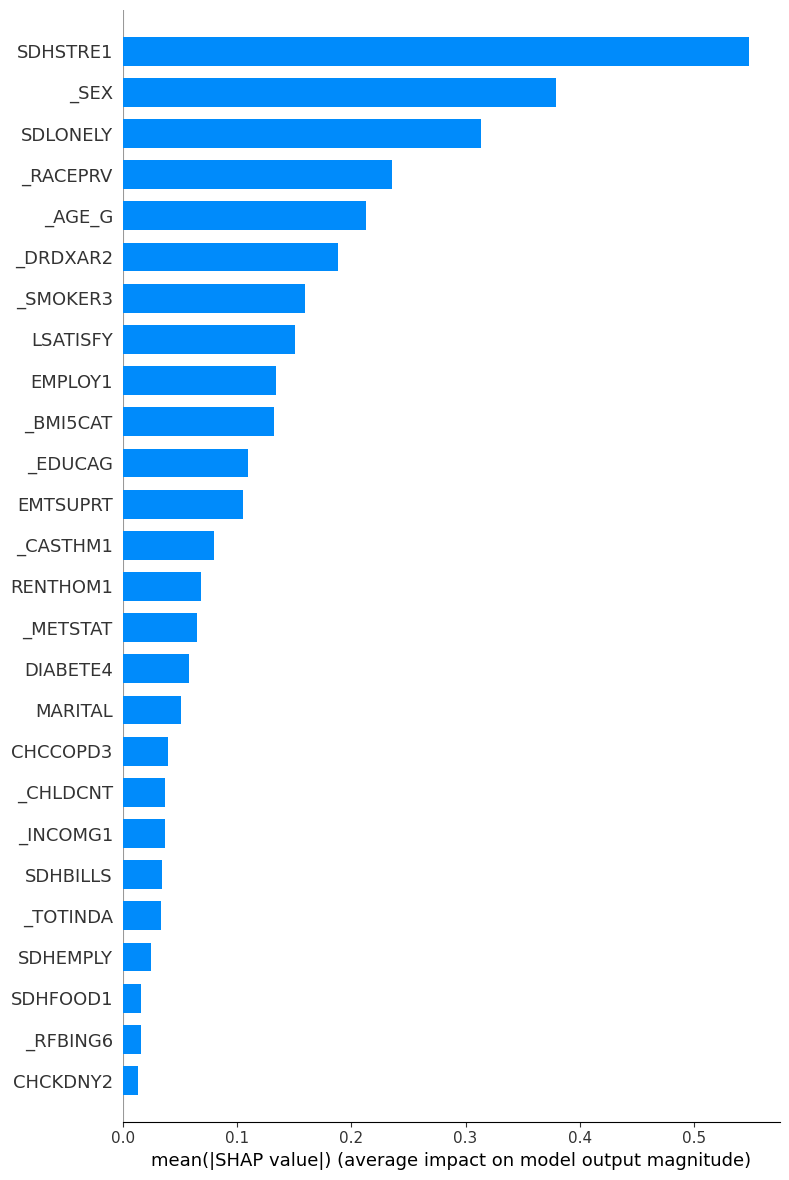

In [46]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=26)


In [41]:
# SHAP force plot untuk 1 prediksi
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


# Saving model

In [42]:
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

In [43]:
best_model = hist_search.best_estimator_
best_model.fit(X_full, y_full)

HistGradientBoostingClassifier(class_weight='balanced',
                               learning_rate=0.26772236667438165, max_depth=3,
                               max_iter=300, min_samples_leaf=10,
                               random_state=42)

In [44]:
import joblib

joblib.dump(best_model, 'final_model.pkl')
print("Model saved ke 'final_model.pkl'")

Model saved ke 'final_model.pkl'


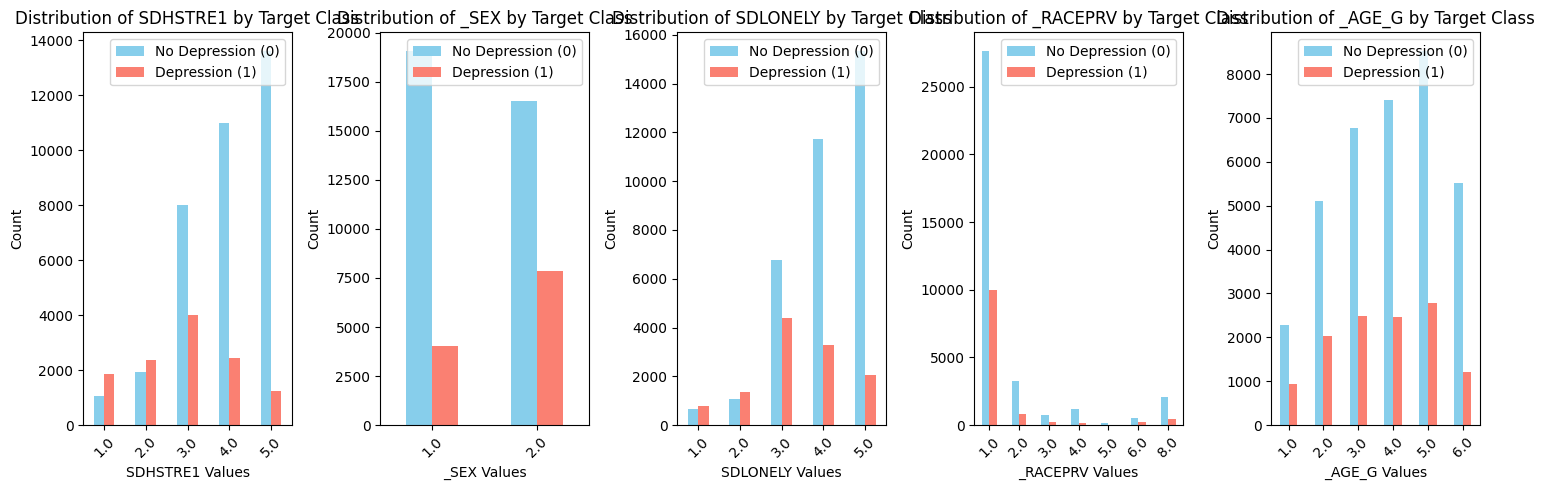

In [55]:
top_3_features = ["SDHSTRE1", "_SEX", "SDLONELY", "_RACEPRV", "_AGE_G"]

# Get the top 3 features and target data
top_3_data = X_test[top_3_features].copy()
top_3_data['Target'] = y_test.values

# Create subplots for the top 3 features
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, feature in enumerate(top_3_features):
    # Group by feature values and target, then count
    feature_counts = top_3_data.groupby([feature, 'Target']).size().unstack(fill_value=0)
    
    # Create bar plot
    feature_counts.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'Distribution of {feature} by Target Class')
    axes[i].set_xlabel(f'{feature} Values')
    axes[i].set_ylabel('Count')
    axes[i].legend(['No Depression (0)', 'Depression (1)'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()